# Análise e Predição
Este notebook contém a análise exploratória e a aplicação de técnicas de aprendizado de máquina.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
from scripts.preprocessamento import carregar_dados, tratar_dados, separar_variaveis, dividir_dados
from scripts.visualizacoes import plot_histograma, plot_boxplot, plot_correlacao, plot_dispersao
from scripts.treinamento_modelos import treinar_modelos, avaliar_modelos
from scripts.metrics import salvar_metricas_csv
from utils.funcoes_auxiliares import salvar_modelo, gerar_radar_chart


In [3]:
df_produtos = carregar_dados('../data/atividade_cap_14_produtos_agricolas.csv')
df_fertilizer = carregar_dados('../data/html_cap_14_fertilizer_prediction.csv')

In [4]:
df_produtos.head(), df_fertilizer.head()
df_produtos.describe(), df_fertilizer.describe()

df_produtos_tratado = tratar_dados(df_produtos)
df_fertilizer_tratado = tratar_dados(df_fertilizer)

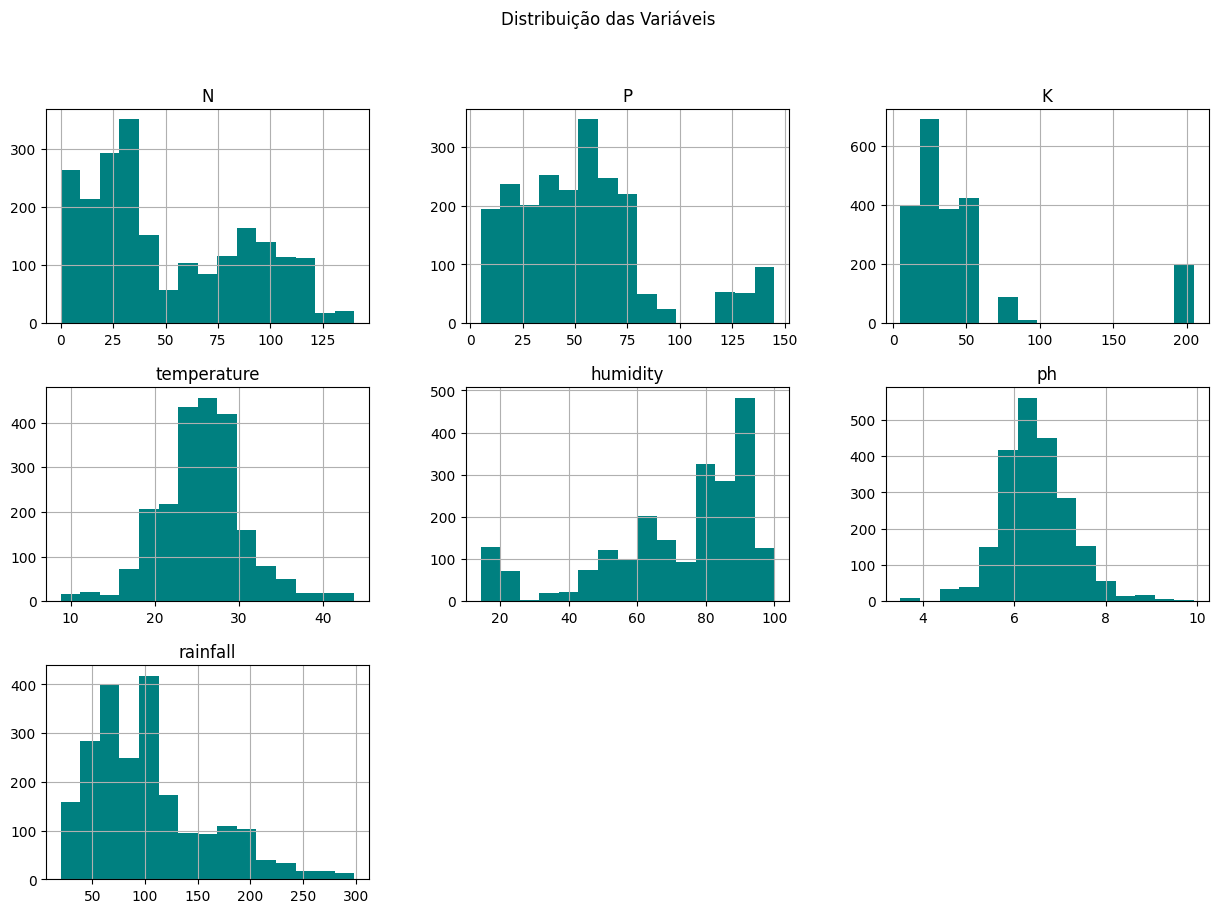

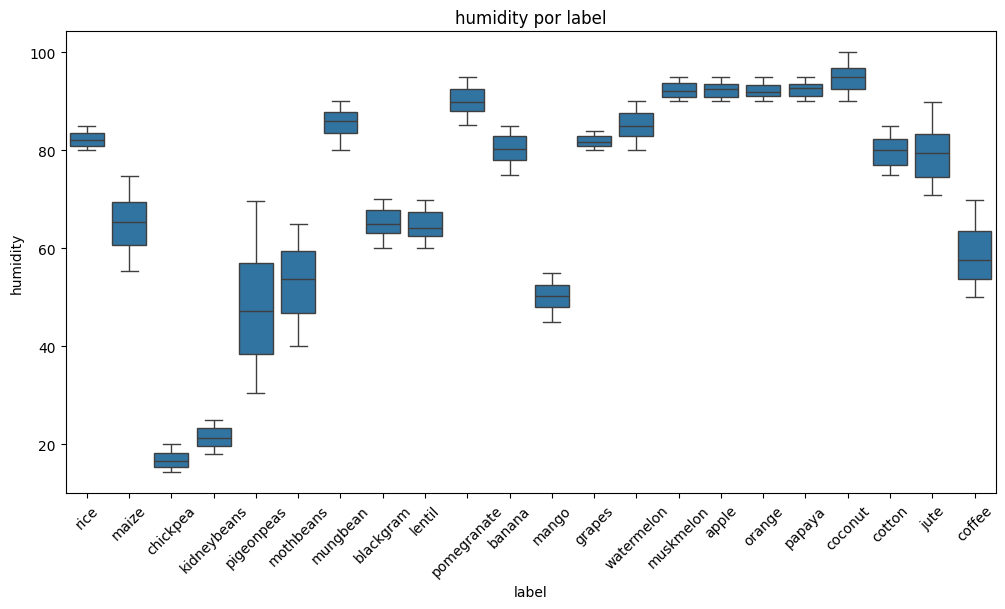

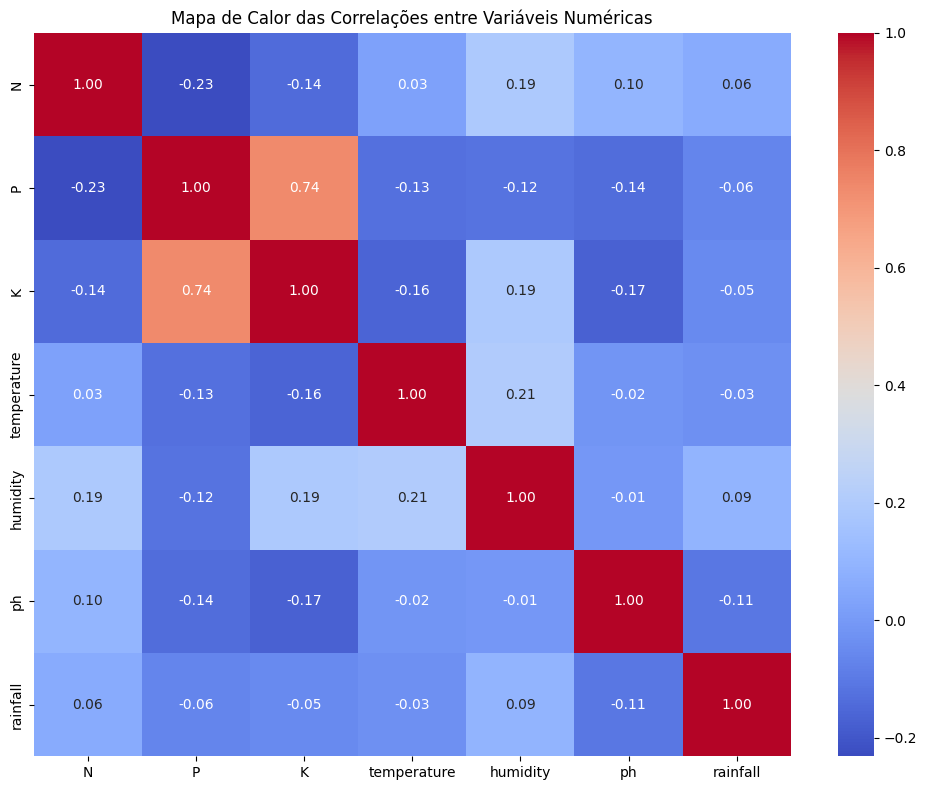

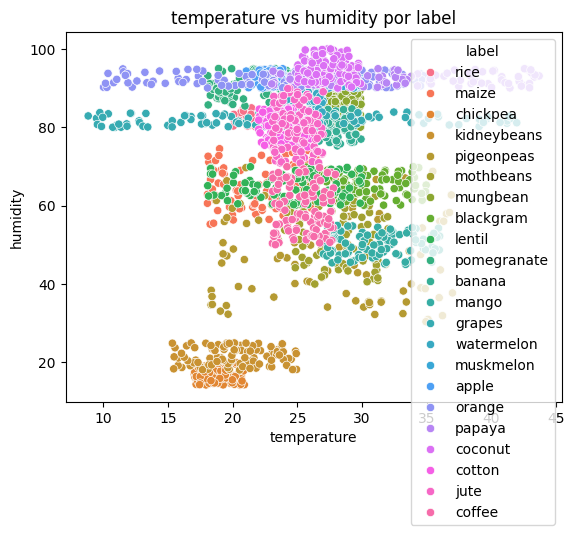

In [5]:
plot_histograma(df_produtos_tratado)

plot_boxplot(df_produtos_tratado, 'label', 'humidity')

plot_correlacao(df_produtos_tratado)

plot_dispersao(df_produtos_tratado, 'temperature', 'humidity', 'label')

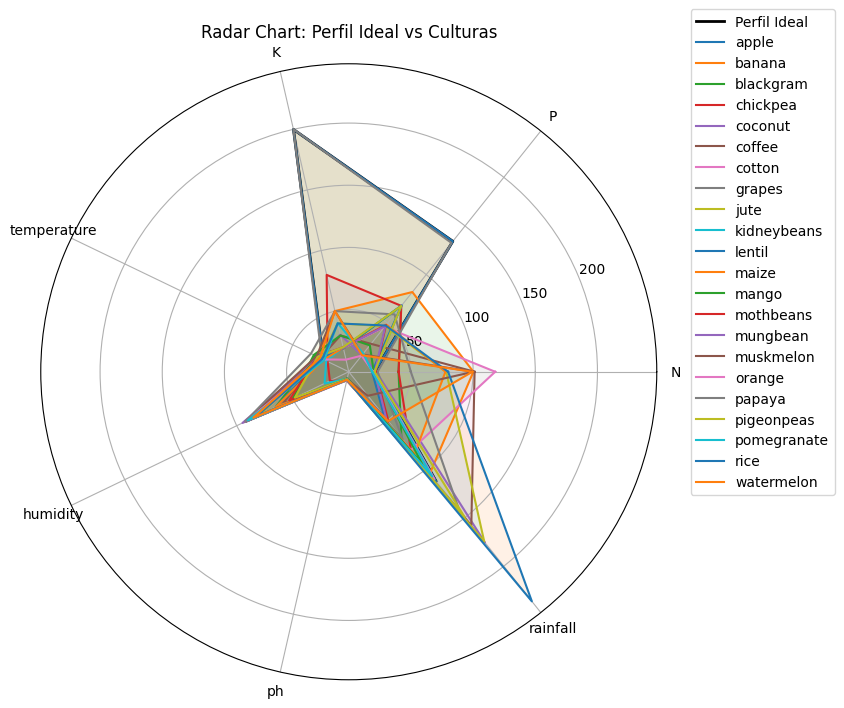

c:\Projetos\Estudos\FIAP\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Decision Tree': {'acuracia': 0.9878787878787879,
  'matriz_confusao': array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0, 

In [6]:
perfil_ideal = df_produtos_tratado.groupby('label').mean()

gerar_radar_chart(perfil_ideal.iloc[0], perfil_ideal.index.tolist(), perfil_ideal)

X_produtos, y_produtos = separar_variaveis(df_produtos_tratado)
X_fertilizer, y_fertilizer = separar_variaveis(df_fertilizer_tratado, target_col='Fertilizer Name')

X_train, X_test, y_train, y_test = dividir_dados(X_produtos, y_produtos)

modelos_treinados = treinar_modelos(X_train, y_train)

resultados = avaliar_modelos(modelos_treinados, X_test, y_test)

resultados

In [7]:
salvar_modelo(modelos_treinados['Decision Tree'], '../results/modelos_salvos/decision_tree.pkl')
salvar_modelo(modelos_treinados['Random Forest'], '../results/modelos_salvos/random_forest.pkl')

salvar_metricas_csv(resultados, '../results/metricas/comparativo_modelos.csv')


,Modelo,Acuracia,Precision Média,Recall Médio
0,Decision Tree,0.987879,0.988063,0.988147
1,Random Forest,0.992424,0.994140,0.991906
2,KNN,0.977273,0.979626,0.977660
3,Logistic Regression,0.956061,0.956267,0.954957
4,SVM,0.963636,0.967759,0.964364
